In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from biological_fuzzy_logic_networks.DREAM_analysis.utils import data_to_nodes_mapping

/home/ubuntu/Extra_data/miniconda3/envs/biofuzznet/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from math import sqrt
def mean_RMSE(ground_truth, predictions, markers=["p.ERK", "p.Akt.Ser473.", "p.S6", "p.HER2", "p.PLCg2"]):
    
    rmse_values = []
    for m in markers:
        for cl in ground_truth["cell_line"].unique():
            rmse = sqrt(sum((ground_truth.loc[ground_truth["cell_line"]==cl, m] - 
                             predictions.loc[predictions["cell_line"]==cl, m])**2) / 
                        len(ground_truth[ground_truth["cell_line"]==cl]))
            rmse_values.append(rmse)
    return sum(rmse_values)/len(rmse_values)

In [3]:
root = "/home/ubuntu/Extra_data/Model/BFN/Subnetwork/19_"
predictions =[]
unscaled_pred = []

for i in range(5):
    CV_output = pd.read_csv(f"{root}{i}/test_output_states.csv", index_col=0)
    with open(f"{root}{i}/scaler.pkl", "rb") as f:
        scaler = pickle.load(f)
        
    unscaled = pd.DataFrame(scaler.inverse_transform(CV_output[scaler.feature_names_in_]), index=CV_output.index, columns=scaler.feature_names_in_)    
    predictions.append(CV_output)
    unscaled_pred.append(unscaled)
    
predictions = pd.concat(predictions)
predictions = predictions.reset_index(drop=False)

unscaled_pred = pd.concat(unscaled_pred)
unscaled_pred = unscaled_pred.reset_index(drop=False)

avg_predictions = predictions.groupby("index").mean()
avg_unscaled_predictions = unscaled_pred.groupby("index").mean()

In [4]:
avg_unscaled_predictions

,cleavedCas,AKT_S473,AKT_T308,AMPK,CREB,ERK12,FAK,GSK3B,H3,JNK,MAPKAPK2,MEK12,MKK36,MKK4,p38,p53,p90RSK,RB,SMAD23,SRC
index,,,,,,,,,,,,,,,,,,,,
0,4.202161,4.565520,3.046575,4.366402,2.424625,3.289906,2.692034,4.50526,3.518354,3.189120,3.042590,1.305233,1.619050,6.97878,5.197021,3.308302,2.861958,5.414077,3.016792,3.833837
1,2.431704,3.928950,3.552417,4.080795,1.655222,2.612825,1.832598,3.66194,2.439566,2.342587,2.105708,1.332669,1.234122,5.23804,3.601901,2.148093,2.342257,4.641496,1.957538,2.182407
2,3.368820,2.952235,2.831727,2.139580,1.005317,1.602328,0.643212,2.19851,1.696308,2.226623,1.637408,1.361158,0.709579,4.93002,3.331127,1.956925,1.592666,3.059219,2.882754,2.458562
3,3.057116,5.484557,3.086064,3.254366,2.171113,3.060976,2.401426,3.75940,2.925220,2.622991,2.477099,1.315273,1.488171,5.86142,4.070062,2.479898,2.685600,4.375722,2.383203,2.100572
4,2.395422,3.984473,2.844199,3.199768,1.947307,3.084403,2.431178,3.94699,2.943175,2.531828,2.490733,1.314283,1.501540,5.67224,4.076446,2.485015,2.703618,4.452209,1.730351,2.669826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320302,4.197110,2.836948,4.006801,4.604195,2.827689,3.881420,3.440238,5.20536,3.943547,3.313455,3.315549,1.275339,1.958782,7.23211,5.303766,3.395041,3.320317,5.893978,2.972844,3.122438
320303,1.147899,3.796737,0.895138,3.672261,1.181091,2.225785,1.345736,3.60246,2.117395,2.362876,1.889375,1.345466,1.019566,5.26475,3.439681,2.033586,2.047769,4.398602,0.551474,1.644971
320304,2.235071,3.701014,0.895138,3.791958,0.954760,1.561855,0.606963,1.12617,1.750453,2.308190,1.705217,1.361878,0.693047,5.11654,3.515683,2.081808,1.566914,3.409807,1.792480,2.724057


In [5]:
test_true = pd.read_csv(f"{root}0/test_data.csv", index_col=0).reset_index(drop=True)


/tmp/ipykernel_1358063/3163686431.py:1: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  test_true = pd.read_csv(f"{root}0/test_data.csv", index_col=0).reset_index(drop=True)


In [6]:
markers = ["RB", "ERK12", "JNK", "cleavedCas", "p38", "MKK36", "MAPKAPK2", "p90RSK", "p53", "CREB", "H3", "MEK12"]

In [7]:
# Load random forest baseline predictions
filenames = [
    "p.MKK3.MKK6",
    "p.p53",
    "p.H3",
    "p.MAPKAPK2",
    "p.p90RSK",
    "p.CREB",
    "p.p38",
    "p.JNK",
    "p.ERK",
    "p.MEK",
    "p.RB",
    "cleavedCas",
]

d_to_n_dict = data_to_nodes_mapping()
baseline_pred = []
for m in filenames:
    m_pred = list(np.load(f"/home/ubuntu/Extra_data/Model/BFN/Subnetwork/RF_baseline/Predictions/{m}.npy"))
    baseline_pred.append(m_pred)

In [8]:
baseline_pred = pd.DataFrame(baseline_pred, index=[d_to_n_dict[m] for m in filenames]).T
baseline_pred[["treatment", "cell_line", "time"]] = test_true[["treatment", "cell_line", "time"]]

In [9]:
test_cell_lines = ["AU565", "EFM19", "HCC2218", "LY2", "MACLS2", "MDAMB436"]
test_unscaled = []
for cl in test_cell_lines:
    cl_data = pd.read_csv(f"/home/ubuntu/Extra_data/Data/DREAMdata/Time_aligned_per_cell_line/CL_incl_test/{cl}.csv")
    cl_data = cl_data[cl_data["time"]==9]
    test_unscaled.append(cl_data)

In [10]:
test_unscaled = pd.concat(test_unscaled).reset_index(drop=True)
test_unscaled = test_unscaled.rename(columns={c: d_to_n_dict[c] for c in test_unscaled.columns if c in d_to_n_dict.keys()})

In [11]:
pd.testing.assert_frame_equal(test_true[["treatment", "time", "cell_line", "fileID", "cellID"]], 
                             test_unscaled[["treatment", "time", "cell_line", "fileID", "cellID"]],
                             check_dtype=False)

In [12]:
avg_predictions[["treatment", "cell_line", "time"]] = test_unscaled[["treatment", "cell_line", "time"]]
avg_unscaled_predictions[["treatment", "cell_line", "time"]] = test_unscaled[["treatment", "cell_line", "time"]]

# Mean vs mean

In [13]:
mean_pred = avg_predictions.groupby(["treatment", "cell_line", "time"]).mean()
mean_unsc_pred = avg_unscaled_predictions.groupby(["treatment", "cell_line", "time"]).mean()
mean_true = test_true.groupby(["treatment", "cell_line", "time"]).mean()
mean_unscaled = test_unscaled.groupby(["treatment", "cell_line", "time"]).mean()
mean_baseline = baseline_pred.groupby(["treatment", "cell_line", "time"]).mean()

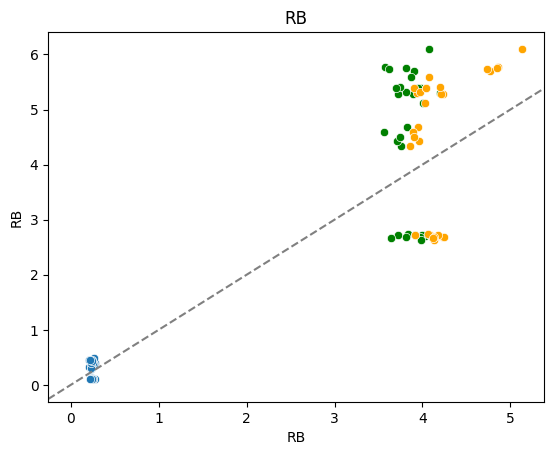

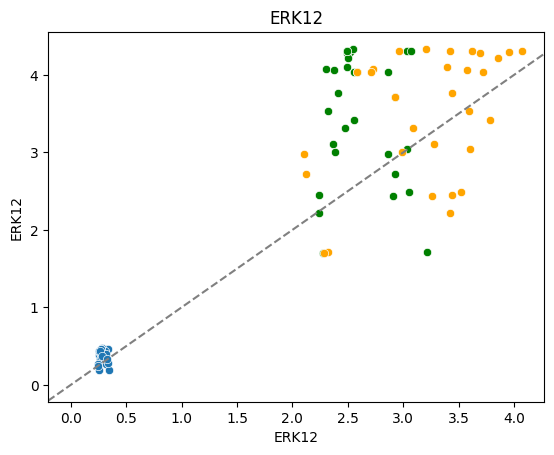

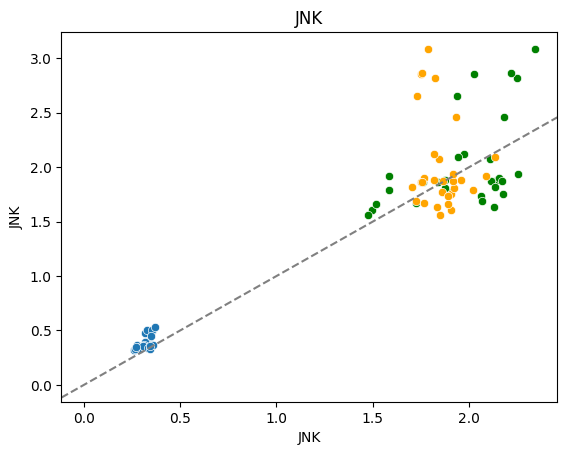

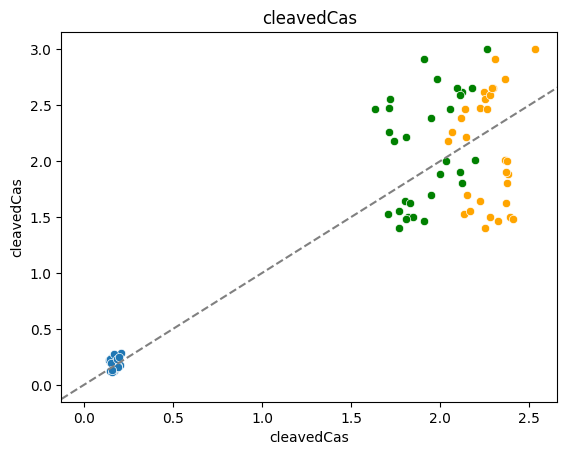

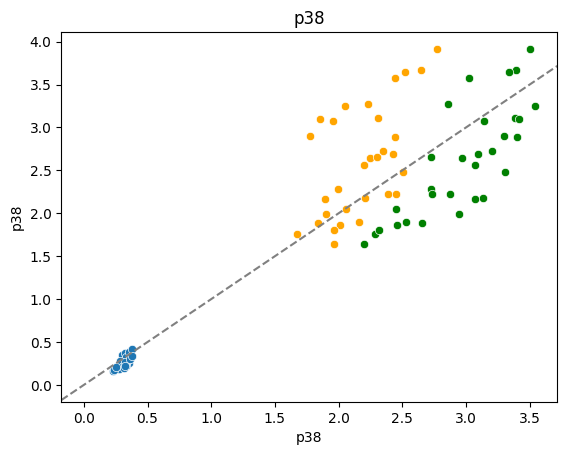

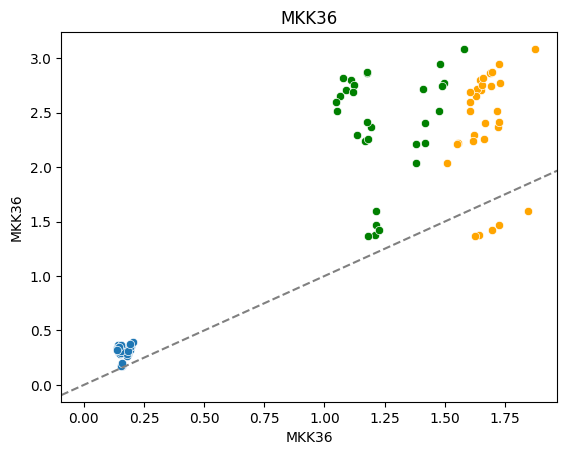

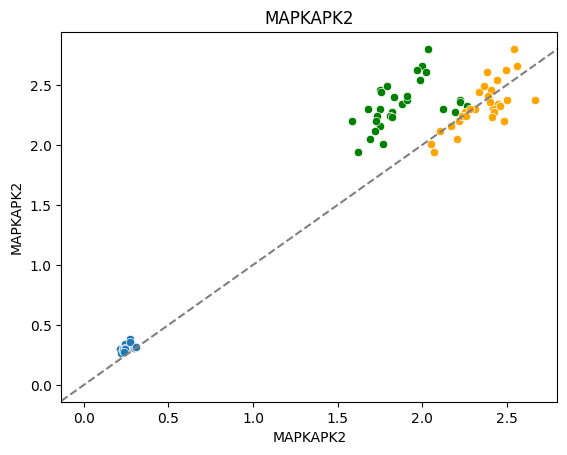

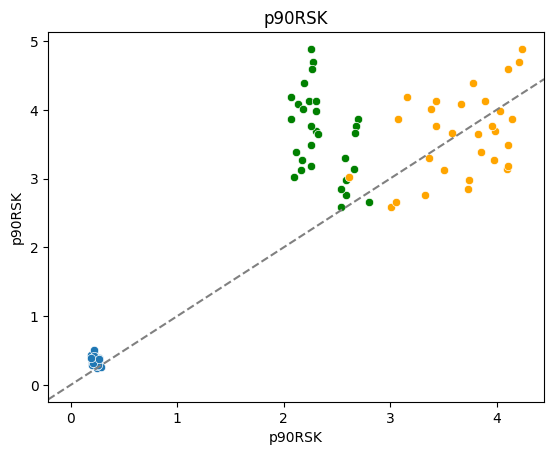

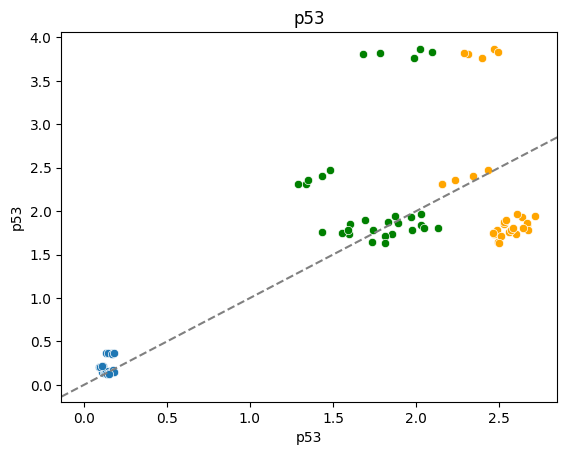

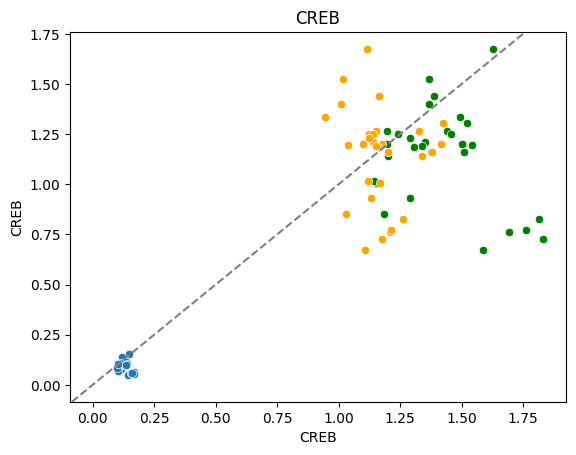

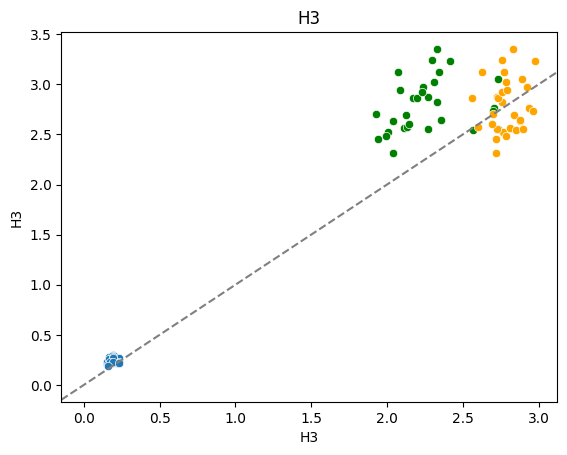

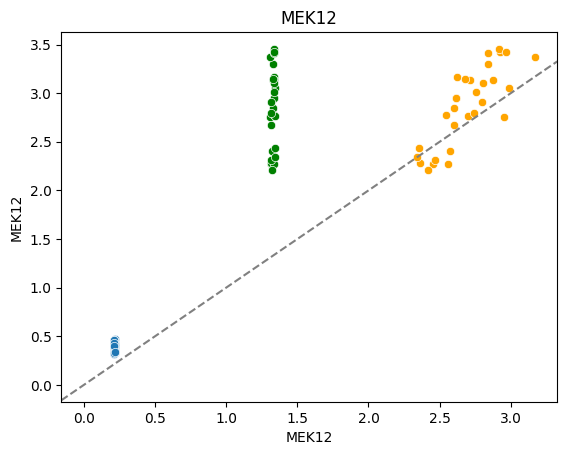

In [14]:
for m in markers:
    sns.scatterplot(x=mean_pred[m], y=mean_true[m])
    sns.scatterplot(x=mean_unsc_pred[m], y=mean_unscaled[m], color="green")
    sns.scatterplot(x=mean_baseline[m], y=mean_unscaled[m], color="orange")
    plt.title(m)
    plt.axline((0,0), slope=1, linestyle="--", color="grey")
    plt.show()

In [15]:
for m in markers:
    mse = (mean_pred[m]-mean_true[m])**2/len(mean_pred)
    R2 = r2_score(mean_true[m], mean_pred[m])
    print("MSE", m, mse.mean())
    print("R2", m, R2.mean())

MSE RB 0.000771168894576137
R2 RB -0.2189593137585375
MSE ERK12 0.0005752960398195586
R2 ERK12 -1.360160364581732
MSE JNK 0.0002137317094981695
R2 JNK -0.7938290217474939
MSE cleavedCas 8.601831625237042e-05
R2 cleavedCas 0.01816576780446566
MSE p38 0.0001382997119368626
R2 p38 0.16582069861220283
MSE MKK36 0.0008385713692642422
R2 MKK36 -5.385859974359395
MSE MAPKAPK2 0.00015927342708329462
R2 MAPKAPK2 -5.809986136680116
MSE p90RSK 0.0008879178687031241
R2 p90RSK -4.389062920284744
MSE p53 0.0003127646635521463
R2 p53 -0.4412210670779382
MSE CREB 6.74139028415068e-05
R2 CREB -2.5317115530694836
MSE H3 0.00013151701005784772
R2 H3 -4.469133990821629
MSE MEK12 0.0011825107635536991
R2 MEK12 -14.822579102767449


# Single cell evaluation

In [16]:
mean_RMSE(predictions=avg_predictions, ground_truth=test_true, markers=markers)

0.14731369424397311

In [17]:
mean_RMSE(predictions=avg_unscaled_predictions, ground_truth=test_unscaled, markers=markers)

1.2761555963382303

In [18]:
mean_RMSE(predictions=baseline_pred, ground_truth=test_unscaled, markers=markers)

0.9733991699707217